In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LineSegment:
    def __init__(self, midpoint=None, slope=None, left_endpoint=None, right_endpoint=None):
        if midpoint is not None and slope is not None:
            # 根据中点和斜率初始化
            self.midpoint = midpoint
            self.slope = slope
            self.calculate_endpoints()
            self.calculate_length()
        elif left_endpoint is not None and slope is not None:
            # 根据左端点和斜率初始化
            self.endpoint1 = left_endpoint
            self.slope = slope
            self.calculate_midpoint_and_right_endpoint()
            self.calculate_length()
        elif right_endpoint is not None and slope is not None:
            # 根据右端点和斜率初始化
            self.endpoint2 = right_endpoint
            self.slope = slope
            self.calculate_midpoint_and_left_endpoint()
            self.calculate_length()
        else:
            raise ValueError("Invalid arguments. Please provide either midpoint and slope, left_endpoint and slope, or right_endpoint and slope.")

    def calculate_endpoints(self):
        # 根据中点和斜率计算两端点坐标
        x_mid, y_mid = self.midpoint
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x1 = x_mid - delta_x
        y1 = y_mid - self.slope * delta_x
        x2 = x_mid + delta_x
        y2 = y_mid + self.slope * delta_x

        self.endpoint1 = (x1, y1)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_right_endpoint(self):
        # 根据左端点和斜率计算中点和右端点
        x1, y1 = self.endpoint1
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x1 + delta_x
        y_mid = y1 + self.slope * delta_x
        x2 = x1 + 2 * delta_x
        y2 = y1 + 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_left_endpoint(self):
        # 根据右端点和斜率计算中点和左端点
        x2, y2 = self.endpoint2
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x2 - delta_x
        y_mid = y2 - self.slope * delta_x
        x1 = x2 - 2 * delta_x
        y1 = y2 - 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint1 = (x1, y1)

    def calculate_length(self):
        # 计算直线段的长度
        length = ((self.endpoint2[0] - self.endpoint1[0])**2 +
                  (self.endpoint2[1] - self.endpoint1[1])**2)**0.5
        self.length = length

    def get_endpoints(self):
        return self.endpoint1, self.endpoint2

    def get_midpoint(self):
        return self.midpoint

    def get_slope(self):
        return self.slope
    
    def intercept(self):
        return self.midpoint[1] - self.slope * self.midpoint[0]





In [3]:
def updateLeft(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    left_endpoint = existing_line.get_endpoints()[1]

    new_line = LineSegment(left_endpoint=left_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)



In [4]:
import matplotlib.pyplot as plt

def plot_line_segments(line_segments, fig=None, ax=None):
    # 如果没有传递 fig 和 ax，则创建一个新的图形和子图对象
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    # 遍历 LineSegment 列表，绘制每一条线段
    for line_segment in line_segments:
        # 获取端点坐标
        endpoints = line_segment.get_endpoints()
        x_values = [endpoints[0][0], endpoints[1][0]]
        y_values = [endpoints[0][1], endpoints[1][1]]

        # 绘制线段
        ax.plot(x_values, y_values , linestyle='-', label=f'Slope: {line_segment.get_slope()}')

    # 添加标签和标题
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_title('Line Segments Plot')

    # 显示图例
    # ax.legend()

    # 如果在函数内部创建了新的图形和子图对象，则显示图形
    if fig is None or ax is None:
        plt.show()

    # 返回图形和子图对象的引用，以便进一步操作（可选）
    return fig, ax


In [5]:
# 示例用法
# 使用中点和斜率初始化
midpoint = (0, 0)
slope = 1
line1 = LineSegment(midpoint=midpoint, slope=slope)

# 使用左端点和斜率初始化
left_endpoint = (0, 0)
slope = 1
line2 = LineSegment(left_endpoint=left_endpoint, slope=slope)

# 使用右端点和斜率初始化
right_endpoint = (2, 2)
slope = 1
line3 = LineSegment(right_endpoint=right_endpoint, slope=slope)

print("Line 1 - Midpoint:", line1.get_midpoint())
print("Line 1 - Endpoints:", line1.get_endpoints())
print("Line 1 - Slope:", line1.get_slope())

print("\nLine 2 - Left Endpoint:", line2.get_endpoints()[0])
print("Line 2 - Right Endpoint:", line2.get_endpoints()[1])
print("Line 2 - Midpoint:", line2.get_midpoint())
print("Line 2 - Slope:", line2.get_slope())


print("\nLine 3 - Left Endpoint:", line3.get_endpoints()[0])
print("Line 3 - Right Endpoint:", line3.get_endpoints()[1])
print("Line 3 - Midpoint:", line3.get_midpoint())
print("Line 3 - Slope:", line3.get_slope())


Line 1 - Midpoint: (0, 0)
Line 1 - Endpoints: ((-0.35355339059327373, -0.35355339059327373), (0.35355339059327373, 0.35355339059327373))
Line 1 - Slope: 1

Line 2 - Left Endpoint: (0, 0)
Line 2 - Right Endpoint: (0.7071067811865475, 0.7071067811865475)
Line 2 - Midpoint: (0.35355339059327373, 0.35355339059327373)
Line 2 - Slope: 1

Line 3 - Left Endpoint: (1.2928932188134525, 1.2928932188134525)
Line 3 - Right Endpoint: (2, 2)
Line 3 - Midpoint: (1.6464466094067263, 1.6464466094067263)
Line 3 - Slope: 1


In [6]:
# 创建一个空的LineSegment数组
line_segments_array = []

# 示例：向数组中添加LineSegment对象
midpoint1 = (1, 1)
slope1 = 2
line1 = LineSegment(midpoint=midpoint1, slope=slope1)
line_segments_array.append(line1)

left_endpoint2 = (0, 0)
slope2 = -1
line2 = LineSegment(left_endpoint=left_endpoint2, slope=slope2)
line_segments_array.append(line2)

# 打印数组中的LineSegment对象信息
for idx, line_segment in enumerate(line_segments_array, start=1):
    print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
    print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
    print(f"Line {idx} - Slope: {line_segment.get_slope()}")

Line 1 - Midpoint: (1, 1)
Line 1 - Endpoints: ((0.7763932022500211, 0.5527864045000421), (1.223606797749979, 1.4472135954999579))
Line 1 - Slope: 2
Line 2 - Midpoint: (0.35355339059327373, -0.35355339059327373)
Line 2 - Endpoints: ((0, 0), (0.7071067811865475, -0.7071067811865475))
Line 2 - Slope: -1


Line 1 - Midpoint: (1, 1)
Line 1 - Endpoints: ((0.7763932022500211, 0.5527864045000421), (1.223606797749979, 1.4472135954999579))
Line 1 - Slope: 2
Line 2 - Midpoint: (1.6708203932499368, 1.6708203932499368)
Line 2 - Endpoints: ((1.223606797749979, 1.4472135954999579), (2.118033988749895, 1.8944271909999157))
Line 2 - Slope: 0.5
Line 3 - Midpoint: (0.35355339059327373, -0.35355339059327373)
Line 3 - Endpoints: ((0, 0), (0.7071067811865475, -0.7071067811865475))
Line 3 - Slope: -1


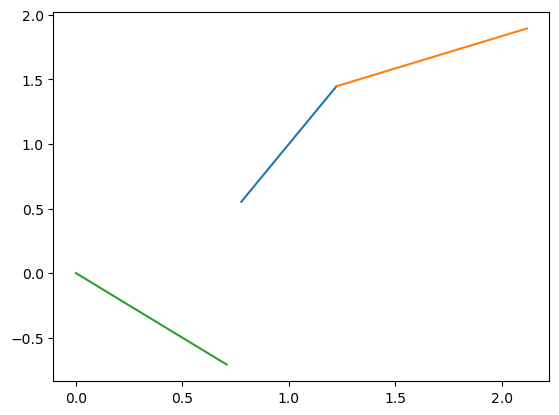

In [7]:

line_segments_array = []

# 添加一些初始的 LineSegment 对象
midpoint1 = (1, 1)
slope1 = 2
line1 = LineSegment(midpoint=midpoint1, slope=slope1)
line_segments_array.append(line1)

left_endpoint2 = (0, 0)
slope2 = -1
line2 = LineSegment(left_endpoint=left_endpoint2, slope=slope2)
line_segments_array.append(line2)

# 调用函数，在索引为 0 的 LineSegment 后插入一个新的 LineSegment
index_to_insert = 0
slope_to_insert = 0.5
updateLeft(line_segments_array, index_to_insert, slope_to_insert)

# 打印更新后的数组中的 LineSegment 对象信息
for idx, line_segment in enumerate(line_segments_array, start=1):
    print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
    print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
    print(f"Line {idx} - Slope: {line_segment.get_slope()}")
    
    
    
plot_line_segments(line_segments_array)

plt.show()

Line 1 - Midpoint: (0.4999993055557163, -599.9991666670525)
Line 1 - Endpoints: ((0, -600), (0.9999986111114326, -599.9983333341049))
Line 1 - Slope: 0.001666668209878258
Line 2 - Midpoint: (1.4999923611244534, -599.9958333445215)
Line 2 - Endpoints: ((0.9999986111114326, -599.9983333341049), (1.9999861111374744, -599.9933333549383))
Line 2 - Slope: 0.0050000416670833376
Line 3 - Midpoint: (2.4999687501268326, -599.9891667364967)
Line 3 - Endpoints: ((1.9999861111374744, -599.9933333549383), (2.9999513891161906, -599.9850001180553))
Line 3 - Slope: 0.00833352623992642
Line 4 - Midpoint: (3.4999173617243744, -599.9791669170513)
Line 4 - Endpoints: ((2.9999513891161906, -599.9850001180553), (3.9998833343325577, -599.9733337160473))
Line 4 - Slope: 0.011667196016474497
Line 5 - Midpoint: (4.4998270853872375, -599.9658339972941)
Line 5 - Endpoints: ((3.9998833343325577, -599.9733337160473), (4.999770836441916, -599.958334278541))
Line 5 - Slope: 0.015001125101259224
Line 6 - Midpoint: (5.4

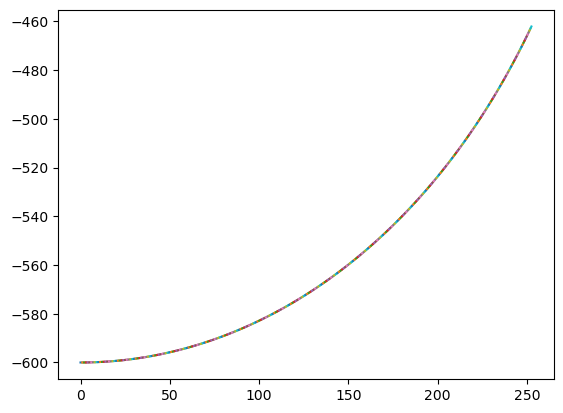

In [8]:
# 创建一个空的LineSegment数组
line_segments_array = []

def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value

left_endpoint1 = (0, -600)
slope1 = circle_slope(0)
line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
line_segments_array.append(line1)


for i in range(1, 300):
    # 调用函数，在索引为 0 的 LineSegment 后插入一个新的 LineSegment
    index_to_insert = i-1
    slope_to_insert = circle_slope(i)
    updateLeft(line_segments_array, index_to_insert, slope_to_insert)

# 打印更新后的数组中的 LineSegment 对象信息
for idx, line_segment in enumerate(line_segments_array, start=1):
    print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
    print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
    print(f"Line {idx} - Slope: {line_segment.get_slope()}")
    

plot_line_segments(line_segments_array)

plt.show()

In [9]:
def lineplot(p1, p2, label=None):
    endpoints = (p1, p2)
    x_values = [endpoints[0][0], endpoints[1][0]]
    y_values = [endpoints[0][1], endpoints[1][1]]
    #ax.plot(x_values, y_values, marker='o', linestyle='-', label=label)
    ax.plot(x_values, y_values,  linestyle='-', label=label)
    
    
    
def reflect_slope(k1,k):
    return (k1*k*k-k1+2*k)/(2*k1*k-k*k+1)


    
def circle_reflect_simple(index):
    
    # 示例用法
    p1 = line_segments_array[index].get_midpoint()
    p2 = (line_segments_array[index].get_midpoint()[0], 25)
    #print(f"xpoints: {p1} - ypoints: {p2}")

    # 在图形中绘制线段，并添加标签
    lineplot(p1, p2, label=f'Slope: {line_segments_array[index].get_slope()}')
    
    #k1 = float('inf')
    k1 = 1000
    
    slope = reflect_slope(k1,line_segments_array[index].get_slope())
    
    line = LineSegment(left_endpoint=line_segments_array[index].get_endpoints()[0], slope=slope)
    
    p3 = (0, line.intercept())
    lineplot(p1, p3, label=f'Slope: {line_segments_array[index].get_slope()}')
    
    



In [10]:
def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value

def find_line_segments_circle(line_segments_array,):

    left_endpoint1 = (0, -600)
    slope1 = circle_slope(0)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_array.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = circle_slope(i)
        updateLeft(line_segments_array, index_to_insert, slope_to_insert)
        
        
def print_line_segments(line_segments_array):
    for idx, line_segment in enumerate(line_segments_array, start=1):
        print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
        print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
        print(f"Line {idx} - Slope: {line_segment.get_slope()}")


In [12]:
def draw_circle(fig=None, ax=None):

    radius = 300
    center = (0, -300)
    theta = np.linspace(np.pi, 2 * np.pi, 1000)  # 修改theta的范围，只考虑下半圆周
    circle_x = radius * np.cos(theta) + center[0]
    circle_y = radius * np.sin(theta) + center[1]

    incident_angle = np.linspace(0, 2 * np.pi, 30)
    reflection_interval = [-np.pi/9, np.pi/9]


    ax.plot(circle_x, circle_y, label='Circle')

Line 1 - Midpoint: (0.4999993055557163, -599.9991666670525)
Line 1 - Endpoints: ((0, -600), (0.9999986111114326, -599.9983333341049))
Line 1 - Slope: 0.001666668209878258
Line 2 - Midpoint: (1.4999923611244534, -599.9958333445215)
Line 2 - Endpoints: ((0.9999986111114326, -599.9983333341049), (1.9999861111374744, -599.9933333549383))
Line 2 - Slope: 0.0050000416670833376
Line 3 - Midpoint: (2.4999687501268326, -599.9891667364967)
Line 3 - Endpoints: ((1.9999861111374744, -599.9933333549383), (2.9999513891161906, -599.9850001180553))
Line 3 - Slope: 0.00833352623992642
Line 4 - Midpoint: (3.4999173617243744, -599.9791669170513)
Line 4 - Endpoints: ((2.9999513891161906, -599.9850001180553), (3.9998833343325577, -599.9733337160473))
Line 4 - Slope: 0.011667196016474497
Line 5 - Midpoint: (4.4998270853872375, -599.9658339972941)
Line 5 - Endpoints: ((3.9998833343325577, -599.9733337160473), (4.999770836441916, -599.958334278541))
Line 5 - Slope: 0.015001125101259224
Line 6 - Midpoint: (5.4

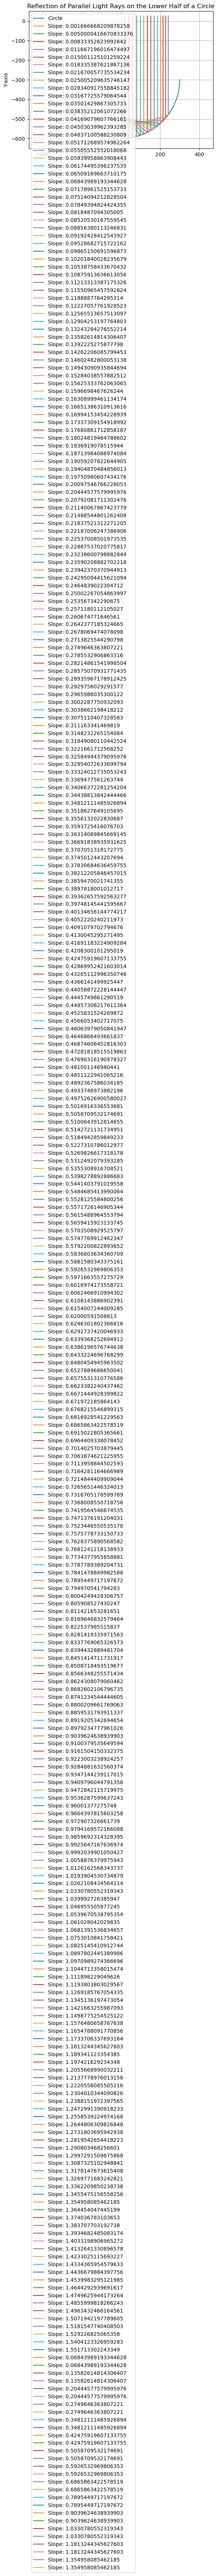

In [16]:
# 创建一个图形窗口和子图对象
fig, ax = plt.subplots()


# draw a circle 
draw_circle(fig, ax)


# draw a bunch of  line segments to fit the circle 
line_segments_array = []

find_line_segments_circle(line_segments_array)
    
print_line_segments(line_segments_array)
    
plot_line_segments(line_segments_array, fig, ax)

for i in range(1, 15):
    circle_reflect_simple(20 * i)


# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-650, 50)

plt.title('Reflection of Parallel Light Rays on the Lower Half of a Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()
